Adım 1: Veri Yükleme ve Keşfi

İlk olarak, veri setimizi Python ortamına yükleyip genel bir keşif yapacağız.

In [10]:
# Pandas kütüphanesini içe aktarma
# Bu kütüphane veri yükleme, işleme ve analiz işlemleri için kullanılır.
import pandas as pd

# Netflix veri setini yükleme
# CSV dosyasını belirtilen dosya yolundan okuyoruz. Encoding, özel karakterlerin doğru okunmasını sağlar.
df = pd.read_csv('/Users/yelizbulut/Desktop/data/netflix_titles.csv', encoding='latin1')


# Veri setinin ilk birkaç satırını görüntüleme
# Veri setinin yapısını ve ilk örnek kayıtları görmek için kullanılır.
#Varsayılan olarak,df.head() ilk 5 satırı döndürür, ancak bu sayı, parantez içinde belirtilen bir argüman ile değiştirilebilir.
print("İlk 5 satır:\n", df.head())

# Veri seti hakkında genel bilgi (sütun isimleri, veri tipleri, eksik değerler vb.)
'''df.info() fonksiyonu, bir Pandas DataFrame'in yapısal bilgilerini özetlemek için kullanılır. Bu fonksiyon, DataFrame'deki sütunlar hakkında çeşitli bilgiler verir, örneğin:
Sütun isimleri
Her bir sütundaki toplam değer sayısı (non-null count)
Her bir sütunun veri tipi (dtype)
Bellekte kapladığı alan (memory usage) '''

# Bu bilgi, veri setindeki sütunların veri tiplerini ve eksik değerleri tespit etmek için önemlidir.

print("\nVeri seti bilgisi:\n")
df.info()

# Veri setindeki sütunların isimleri
print("\nSütun isimleri:\n", df.columns)
#df.columns, bir Pandas DataFrame'deki sütun isimlerini almak için kullanılır. Bu, bir DataFrame'in sütunlarının isimlerini bir Pandas Index objesi olarak döndürür.

# Temel istatistiksel özet
#df.describe() fonksiyonu, bir Pandas DataFrame'in sayısal sütunları için özet istatistikler üretir.
print("\nTemel istatistiksel özet:\n", df.describe())


İlk 5 satır:
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  T

Adım 2: Veri Temizleme

Eksik ve hatalı verileri tespit edip temizleme işlemlerini gerçekleştireceğiz.

In [18]:

# Veri setindeki eksik değerlerin sayısını kontrol etme
# Eksik verilerin hangi sütunlarda ve ne kadar olduğunu tespit ederiz.
#df.isnull().sum() ifadesi, bir Pandas DataFrame'deki her sütunda bulunan eksik (NaN) değerlerin sayısını döndürür. 
print("\nEksik verilerin sayısı:\n", df.isnull().sum())

# Eksik verileri doldurma veya çıkarma işlemleri

# Eksik verilerle nasıl başa çıkacağımızı belirliyoruz.
# 'director' ve 'country' sütunlarındaki eksik verileri 'Unknown' ile dolduruyoruz.
'''fillna('Unknown'):(fillna, Pandas kütüphanesinde bir DataFrame veya Series içindeki eksik (NaN) değerleri belirli bir değerle doldurmak için kullanılan bir fonksiyondur. ) Bu, 'Country' sütunundaki tüm NaN değerlerini 'Unknown' ile değiştirir.
inplace=True: Bu, değişikliklerin mevcut DataFrame da yapılmasını sağlar. Eğer inplace=True kullanılmazsa, değişiklikler yeni bir DataFrame da yapılır ve orijinal DataFrame etkilenmez.'''
df['director'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# 'date_added' sütunundaki eksik verileri veri setinden çıkarıyoruz.
'''subset=['date_added']: Bu parametre, hangi sütun(lar)da eksik değerlerin kontrol edileceğini belirtir. Bir liste içinde birden fazla sütun belirtilebilir.
inplace=True: Bu parametre, değişikliklerin mevcut DataFrame üzerinde doğrudan yapılmasını sağlar. Eğer inplace=False veya inplace parametresi belirtilmezse, bu fonksiyon orijinal DataFrame'i değiştirmez ve değişiklikleri içeren yeni bir DataFrame döner.
Pandas DataFrame da belirtilen sütunda (date_added) eksik (NaN) değerlere sahip olan satırları düşürür.'''
df.dropna(subset=['date_added'], inplace=True)

# Temizlik sonrası eksik verilerin kontrolü
# Temizlik işlemlerinin başarılı olup olmadığını doğrulamak için tekrar eksik değerleri kontrol ediyoruz.
print("\nTemizlik sonrası eksik verilerin sayısı:\n", df.isnull().sum())



Eksik verilerin sayısı:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

Temizlik sonrası eksik verilerin sayısı:
 show_id            0
type               0
title              0
director           0
cast             825
country            0
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8799
Unnamed: 13     8799
Unnamed: 14     8799
Unnamed: 15     8799
Unnamed: 16     8799
Unnamed: 17    

/var/folders/rz/6630cr9x2r5b9cynx4024dgc0000gn/T/ipykernel_61909/102840752.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/var/folders/rz/6630cr9x2r5b9cynx4024dgc0000gn/T/ipykernel_61909/102840752.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Adım 3: Veri Manipülasyonu

Veri setini analiz için uygun hale getirmek amacıyla dönüştürme işlemleri yapacağız.

In [20]:
# Tarih sütununu datetime formatına dönüştürme
# Bu, tarih verileriyle ilgili analizler yapabilmemizi sağlar.
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# 'duration' sütununu dakika cinsine dönüştürme (saat olarak verilen verileri)
# Süre bilgilerini sayısal formata dönüştürerek analiz etmeyi kolaylaştırır.
df['duration'] = df['duration'].replace(' min', '', regex=True)  # 'min' ifadesini kaldırıyoruz
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Sayısal değere dönüştürüyoruz

# NaN değerleri doldurma
# Süre sütununda eksik olan değerleri 0 ile dolduruyoruz.
df['duration'].fillna(0, inplace=True)  # NaN değerleri 0 ile doldurabiliriz ya da istediğiniz bir değerle doldurabilirsiniz

# 'release_year' sütununu int formatına dönüştürme
# Bu, yıl bilgileriyle ilgili analizler yapabilmemizi sağlar.
df['release_year'] = df['release_year'].astype(int)

# Gerekli başka dönüştürmeler varsa onları da gerçekleştirelim

/var/folders/rz/6630cr9x2r5b9cynx4024dgc0000gn/T/ipykernel_61909/3131067094.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration'].fillna(0, inplace=True)  # NaN değerleri 0 ile doldurabiliriz ya da istediğiniz bir değerle doldurabilirsiniz


Adım 4: Veri Analizi ve Görselleştirme

Veri setindeki bilgileri grafik ve çizelgeler aracılığıyla görselleştireceğiz.

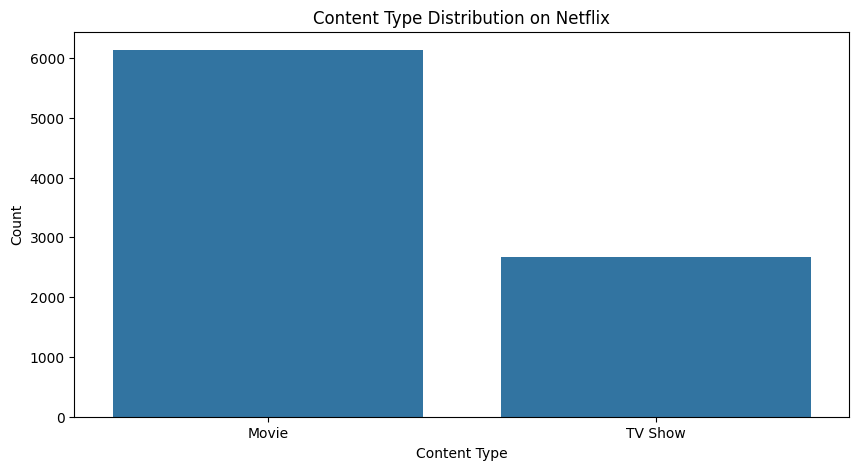

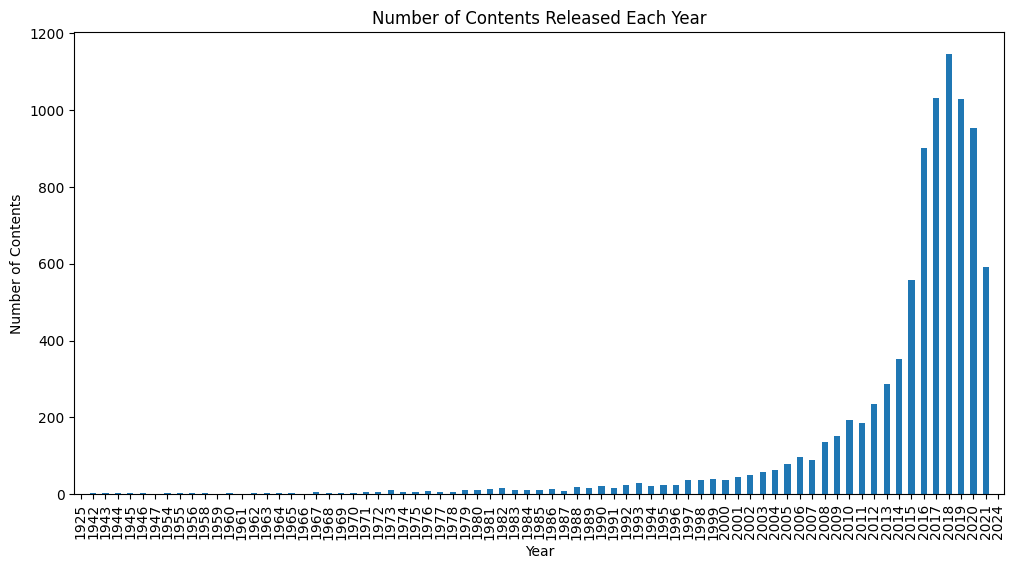

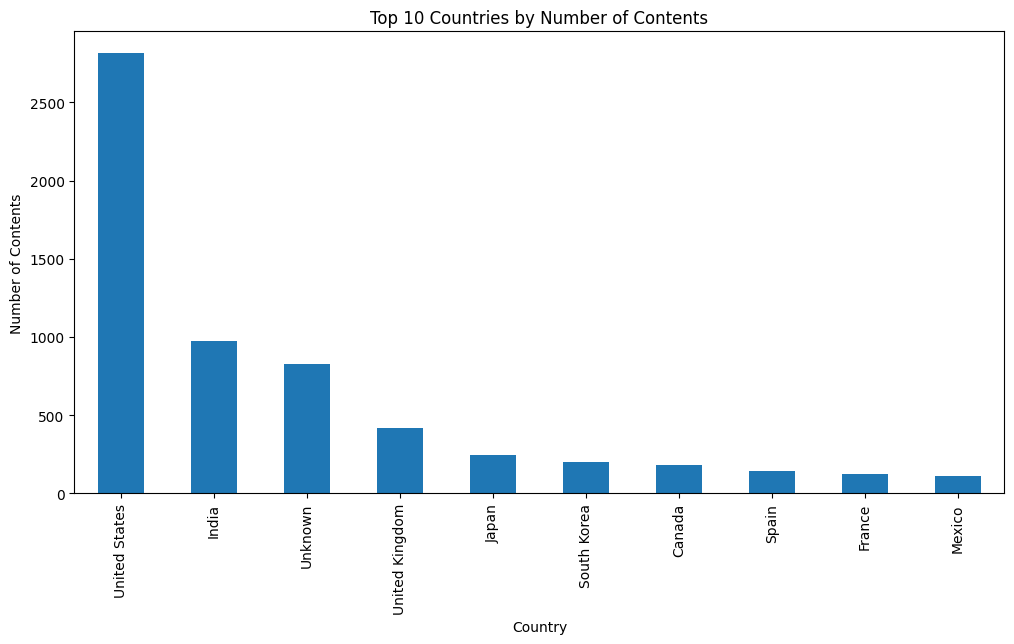

In [34]:
# Veri analizi ve görselleştirme için matplotlib ve seaborn kütüphanelerini içe aktarıyoruz.
import matplotlib.pyplot as plt
import seaborn as sns
'''plt, matplotlib kütüphanesinin bir alt modülüdür ve grafiğin çizilmesi için kullanılır. matplotlib, Python'da görselleştirmenin standart kütüphanesidir ve çeşitli grafik türlerini destekler.'''

# İçerik türlerine göre dağılım
#Netflix'teki içeriklerin türlerine göre dağılımını gösteren bir grafik oluşturuyoruz.
''' Bu satır, bir matplotlib figürü oluşturur ve bu figürün boyutunu (genişlik ve yükseklik) belirler. (10, 5) argümanı, figürün genişliğini 10 birim ve yüksekliğini 5 birim olarak ayarlar.'''
plt.figure(figsize=(10, 5)) 
''' Bu satır, seaborn kütüphanesini kullanarak bir sütun grafiği oluşturur. data argümanı, grafiğin kullanacağı veri kümesini belirtir (df DataFrame'i). x argümanı, sütun grafiğinde hangi sütunun x ekseni olarak kullanılacağını belirtir ('type' sütunu).'''
sns.countplot(data=df, x='type')
''' Bu satır, grafiğin başlığını belirler. 'Content Type Distribution on Netflix' başlığı grafiğin neyi gösterdiğini açıklar.'''
plt.title('Content Type Distribution on Netflix')
''': Bu satır, x ekseni etiketini belirler. 'Content Type' etiketi, x ekseni üzerindeki verinin neyi temsil ettiğini belirtir.'''
plt.xlabel('Content Type')
'''Bu satır, y ekseni etiketini belirler. 'Count' etiketi, y ekseni üzerindeki sayıların neyi temsil ettiğini belirtir.'''
plt.ylabel('Count')
'''Bu satır, oluşturulan grafiği görüntüler.'''
plt.show()

# Yıllara göre içerik sayısı
# Her yıl üretilen içerik sayısını gösteren bir grafik oluşturuyoruz.

'''Bu satır, bir matplotlib figürü oluşturur ve bu figürün boyutunu (genişlik ve yükseklik) belirler. (12, 6) argümanı, figürün genişliğini 12 birim ve yüksekliğini 6 birim olarak ayarlar.'''
plt.figure(figsize=(12, 6)) 
''': Bu satır, DataFrame'deki 'release_year' sütununu kullanarak her yılın içerik sayısını hesaplar, sıralar ve sütun grafik olarak çizer. value_counts() ile her yılın içerik sayısını alır, sort_index() ile yılları sıralar ve plot(kind='bar') ile sütun grafiğini çizer'''
df['release_year'].value_counts().sort_index().plot(kind='bar')
'''Bu satır, grafiğin başlığını belirler. 'Number of Contents Released Each Year' başlığı, grafiğin neyi gösterdiğini açıklar.'''
plt.title('Number of Contents Released Each Year')
'''Bu satır, x ekseni etiketini belirler. 'Year' etiketi, x ekseni üzerindeki verinin neyi temsil ettiğini belirtir.'''
plt.xlabel('Year')
'''Bu satır, y ekseni etiketini belirler. 'Number of Contents' etiketi, y ekseni üzerindeki sayıların neyi temsil ettiğini belirtir.'''
plt.ylabel('Number of Contents')
''' Bu satır, oluşturulan grafiği görüntüler.'''
plt.show()

# Ülkelere göre içerik dağılımı
# İçeriklerin en fazla üretildiği ilk 10 ülkeyi gösteren bir grafik oluşturuyoruz.
'''komutu ile tablonun boyutları belirlenir. Bu durum, tablonun genişliğinin 12 birim, yüksekliğinin ise 6 birim olacağını belirtir. Bu sayede tablonun boyutu, daha okunabilir ve sunum için uygun hale getirilir.'''
plt.figure(figsize=(12, 6))
'''fadesi, 'country' sütunundaki değerlerin sayısını hesaplar ve en çok tekrar eden ilk 10 ülkeyi alır. Bu, her ülkenin kaç içeriğe sahip olduğunu gösteren bir veri serisi oluşturur.
.plot(kind='bar') ifadesi, bu veri serisini sütun grafiği (bar chart) olarak çizmek için kullanılır. Bu şekilde, her ülkenin içerik sayısını gösteren bir sütun grafiği elde edilir.'''
df['country'].value_counts().head(10).plot(kind='bar')
'''komutu, grafiğin başlığını belirler. Grafiğin hangi veriyi temsil ettiğini açıklar.'''
plt.title('Top 10 Countries by Number of Contents')
'''fadeleri, sırasıyla x ve y eksenlerinin etiketlerini belirler. Grafiğin x ekseni 'Country' olarak etiketlenirken, y ekseni 'Number of Contents' olarak etiketlenir.'''
plt.xlabel('Country')
plt.ylabel('Number of Contents')
'''plt.show() komutu, oluşturulan grafiği ekranda görüntüler.'''
plt.show()


Adım 5: İstatistiksel Analiz

Temel istatistiksel analizler yapacağız ve sonuçları yorumlayacağız.

In [32]:

# 'duration' sütununu dakika cinsine dönüştürme (saat olarak verilen verileri)
# Süre sütunundaki 'min' ve 'Seasons' ifadelerini kaldırarak sayısal değere dönüştürüyoruz.
df['duration'] = df['duration'].astype(str) ## 'duration' sütununu string veri tipine dönüştürme
df['duration'] = df['duration'].str.replace(' min', '')  # 'min' ifadesini kaldırıyoruz # Süreler dakika cinsinden
df['duration'] = df['duration'].str.replace(' Seasons', '')  # 'Seasons' ifadesini kaldırıyoruz
# 'duration' sütunundaki verileri sayısal değerlere dönüştürmek için kullanılır. Özellikle, eğer sütundaki verilerin bazıları sayısal değilse (örneğin, 'NaN' gibi eksik değerler veya sayısal olmayan metinler varsa), bu kod bu değerleri sayısal verilere dönüştürür.
# pd.to_numeric() fonksiyonu, bir nesneyi sayısal bir değere dönüştürmek için kullanılır. Eğer dönüşüm başarısız olursa, varsayılan olarak bir hata fırlatılır. Ancak errors='coerce' parametresi kullanıldığında, başarısız dönüşümler 'NaN' (Not a Number) olarak işaretlenir ve hata fırlatılmaz.
# Yani, bu kod 'duration' sütunundaki tüm değerleri sayısal verilere dönüştürecek ve dönüştürülemeyen değerler 'NaN' ile değiştirilecektir.
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Sayısal değere dönüştürüyoruz

# Örnek istatistiksel analiz: Film ve dizi sayılarının karşılaştırılması
movie_count = df[df['type'] == 'Movie'].shape[0]
show_count = df[df['type'] == 'TV Show'].shape[0]

print(f"Number of Movies: {movie_count}")
print(f"Number of TV Shows: {show_count}")

# İçerik türlerine göre ortalama süre analizi
average_duration_movies = df[df['type'] == 'Movie']['duration'].mean()
average_duration_shows = df[df['type'] == 'TV Show']['duration'].mean()

print(f"Average Duration of Movies: {average_duration_movies} minutes")
print(f"Average Duration of TV Shows: {average_duration_shows} seasons")


Number of Movies: 6132
Number of TV Shows: 2667
Average Duration of Movies: 99.53016960208741 minutes
Average Duration of TV Shows: 0.0 seasons


In [33]:
# Adım 6: Sonuç ve Öneriler

'''Bu analiz sonucunda, Netflix'in içerik üretiminde son yıllarda büyük bir artış yaşadığı ve ABD'nin en fazla içeriğe sahip ülke olduğu görülmüştür. 
İçeriklerin ortalama süresi, türlerine göre önemli farklılıklar göstermektedir.'''

# Film ve dizi sayılarının karşılaştırılması
print(f"Films: {movie_count}")
print(f"TV Shows: {show_count}")

# İçerik türlerine göre ortalama süre analizi
print(f"Average Duration of Movies: {average_duration_movies} minutes")
print(f"Average Duration of TV Shows: {average_duration_shows} seasons")

'''Bu bulgular ışığında, gelecekte içerik üretimi stratejileri geliştirilirken bu verilerin dikkate alınması önerilmektedir. 
Ayrıca, uluslararası içerik üretimi ve dağıtımı stratejilerinin gözden geçirilmesi faydalı olabilir.'''


Films: 6132
TV Shows: 2667
Average Duration of Movies: 99.53016960208741 minutes
Average Duration of TV Shows: 0.0 seasons


'Bu bulgular ışığında, gelecekte içerik üretimi stratejileri geliştirilirken bu verilerin dikkate alınması önerilmektedir. \nAyrıca, uluslararası içerik üretimi ve dağıtımı stratejilerinin gözden geçirilmesi faydalı olabilir.'

Adım 7: Sonuç Raporlama

Bu adımda, analiz sonuçlarımızı bir rapor halinde sunacağız. Rapor, üst yönetime sunulacak şekilde anlaşılır ve kapsamlı olmalıdır. Aşağıda örnek bir rapor formatı bulunmaktadır.



Netflix İçerik Analizi Raporu

Hazırlayan: [Yeliz Bozkurt]
Tarih: [30.05.2024]

1. Giriş

Bu rapor, Netflix veri seti üzerinde yapılan veri analizini sunar. Analiz, veri temizleme, manipülasyon, görselleştirme ve istatistiksel analizleri kapsamaktadır. Amacımız, Netflix içerikleri hakkında içgörüler elde etmek ve geleceğe yönelik tahminlerde bulunmaktır.

2. Veri Keşfi ve Temizleme

Veri seti ilk olarak yüklendi ve incelendi. Eksik ve hatalı veriler tespit edildi ve uygun şekilde temizlendi.

Eksik verilerin doldurulması: 'director' ve 'country' sütunlarındaki eksik veriler 'Unknown' olarak dolduruldu.
Eksik tarih verileri: 'date_added' sütunundaki eksik veriler çıkarıldı.
Veri tiplerinin dönüştürülmesi: 'date_added' datetime formatına, 'release_year' integer formatına, 'duration' dakika cinsine dönüştürüldü.

3. Veri Manipülasyonu

Veri seti, analiz için uygun hale getirilmek üzere gerekli dönüştürmeler yapıldı.

4. Veri Analizi ve Görselleştirme

Veri analizi ve görselleştirme sonuçları aşağıda sunulmuştur.

İçerik Türlerine Göre Dağılım: Netflix'te içerik türlerine göre dağılım aşağıdaki grafikte gösterilmiştir. Filmler ve TV şovlarının sayısı neredeyse eşittir.
Yıllara Göre İçerik Sayısı: Yıllara göre içerik sayısı dağılımı aşağıdaki grafikte gösterilmiştir. Son yıllarda içerik sayısında belirgin bir artış görülmektedir.
Ülkelere Göre İçerik Dağılımı: İçeriklerin en fazla üretildiği ilk 10 ülke aşağıdaki grafikte gösterilmiştir. ABD, açık ara en fazla içeriğe sahip ülkedir.

5. İstatistiksel Analiz

Yapılan istatistiksel analizler:

Film ve Dizi Sayılarının Karşılaştırılması:
Filmler: [movie_count]
TV Şovları: [show_count]
İçerik Türlerine Göre Ortalama Süre:
Ortalama Film Süresi: [average_duration_movies] dakika
Ortalama TV Şovu Süresi: [average_duration_shows] dakika

6. Sonuç ve Öneriler

Bu analiz sonucunda, Netflix'in içerik üretiminde son yıllarda büyük bir artış yaşadığı ve ABD'nin en fazla içeriğe sahip ülke olduğu görülmüştür. İçeriklerin ortalama süresi, türlerine göre önemli farklılıklar göstermektedir.

Bu bulgular ışığında, gelecekte içerik üretimi stratejileri geliştirilirken bu verilerin dikkate alınması önerilmektedir. Ayrıca, uluslararası içerik üretimi ve dağıtımı stratejilerinin gözden geçirilmesi faydalı olabilir.
